In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
# csv파일 인코딩 형태 확인
import chardet
# filename = 'C:\\Workspace\\python\\Data_Science\\dataA\\credits.csv'
filename = 'C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\slr12.csv'
with open(filename, 'rb') as f:
    result = chardet.detect(f.readline())  # or read() if the file is small.
    print(result['encoding'])

UTF-8-SIG


In [8]:
df = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\slr12.csv')
df.head()

,AnnualFranchiseFee,StartUpCost
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [10]:
x = df.AnnualFranchiseFee.values
y = df.StartUpCost.values
x, y

(array([1000, 1125, 1087, 1070, 1100, 1150, 1250, 1150, 1100, 1350, 1275,
        1375, 1175, 1200, 1175, 1300, 1260, 1330, 1325, 1200, 1225, 1090,
        1075, 1080, 1080, 1180, 1225, 1175, 1250, 1250,  750, 1125,  700,
         900,  900,  850], dtype=int64),
 array([1050, 1150, 1213, 1275, 1300, 1300, 1400, 1400, 1250, 1830, 1350,
        1450, 1300, 1300, 1275, 1375, 1285, 1400, 1400, 1285, 1275, 1135,
        1250, 1275, 1150, 1250, 1275, 1225, 1280, 1300, 1250, 1175, 1300,
        1250, 1300, 1200], dtype=int64))

In [19]:
def get_mean(arr):
    return np.sum(arr) / len(arr)

def get_variance(arr, mean):
    return np.sum((arr - mean)**2)

def get_covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x - mean_x) * (arr_y - mean_y)
    return np.sum(final_arr)

def get_coefficients(x, y):
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    m = get_covariance(x, x_mean, y, y_mean) / get_variance(x, x_mean)
    c = y_mean - (x_mean * m)
    return m, c

def linear_regression(x_train, y_train, x_test, y_test):
    prediction = []
    m, c = get_coefficients(x_train, y_train)
    for x in x_test:
        y = m * x + c
        prediction.append(y)

    mse = mean_squared_error(prediction, y_test)
    print('The MSE score of the model is : ', mse)
    return prediction

def plot_reg_line(x, y):
    prediction = []
    m, c = get_coefficients(x, y)
    for x0 in range(650, 1400):
        yhat = m * x0 + c
        prediction.append(yhat)
    
    fig = plt.figure(figsize = (20, 7))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x = x, y = y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot between X and Y')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x = x, y = y, color = 'blue')
    sns.lineplot(x = [i for i in range(650, 1400)], y = prediction, color = 'red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regreesion Plot')
    plt.show()

In [20]:
linear_regression(x[:30], y[:30], x[30:], y[30:])

The MSE score of the model is :  97482.15509744169


[863.2891581051077,
 1237.6414070056592,
 813.3755249183675,
 1013.0300576653283,
 1013.0300576653283,
 963.1164244785881]

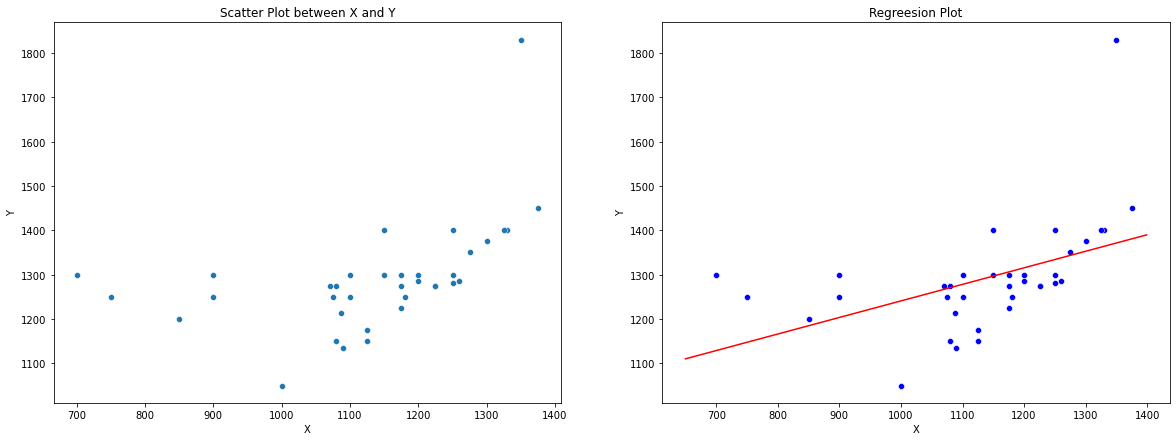

In [46]:
plot_reg_line(x, y)

In [47]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x[:30].reshape(-1, 1), y[:30])
prediction = reg.predict(x[30:].reshape(-1, 1))
mse = mean_squared_error(prediction, y[30:])

print('The MSE score of the model is: ', mse)

The MSE score of the model is:  97482.15509744169


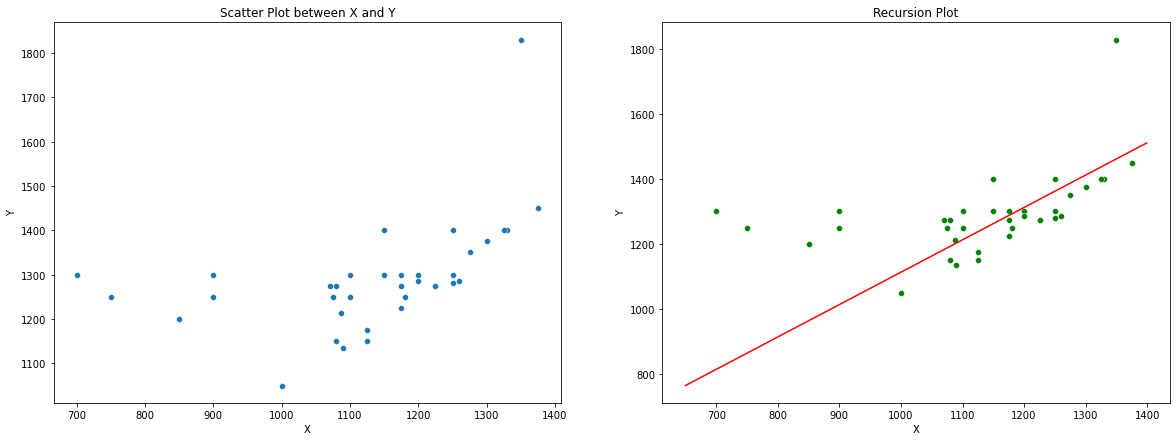

In [49]:
prediction = reg.predict(np.array([i for i in range(650, 1400)]).reshape(-1, 1))

fig = plt.figure(figsize = (20, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x= x, y = y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot between X and Y')

plt.subplot(1, 2, 2)
sns.scatterplot(x = x, y = y, color = 'green')
sns.lineplot(x = [i for i in range(650, 1400)], y = prediction, color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Recursion Plot')
plt.show()